# Save the high-res image

This example shows how to plot random data on the brain and save it as an image file.

![](save_image_pillow.png)


## Render the image

The `brain_plot` function renders the image based on data `v` and returns a NumPy array.
The Numpy array has a `np.float64` dtype, and the range of its values is 0--1.

In [1]:
import numpy as np
from brainplotlib import brain_plot

rng = np.random.default_rng(0)
v = rng.random((1175, ))

img = brain_plot(v, vmax=1, vmin=0, cmap='viridis')

print(img.dtype, img.shape)
print(img.max(), img.min())

float64 (1560, 1728, 4)
1.0 0.0


## Save the image
The rendered image can be saved using the package of your choice:

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(img.shape[1] / 200, img.shape[0] / 200), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img)
ax.axis('off')
plt.savefig('save_image_matplotlib.png')
plt.close()

In [3]:
from PIL import Image
im = Image.fromarray(
    np.round(img * 255).astype(np.uint8))
im.save('save_image_pillow.png')

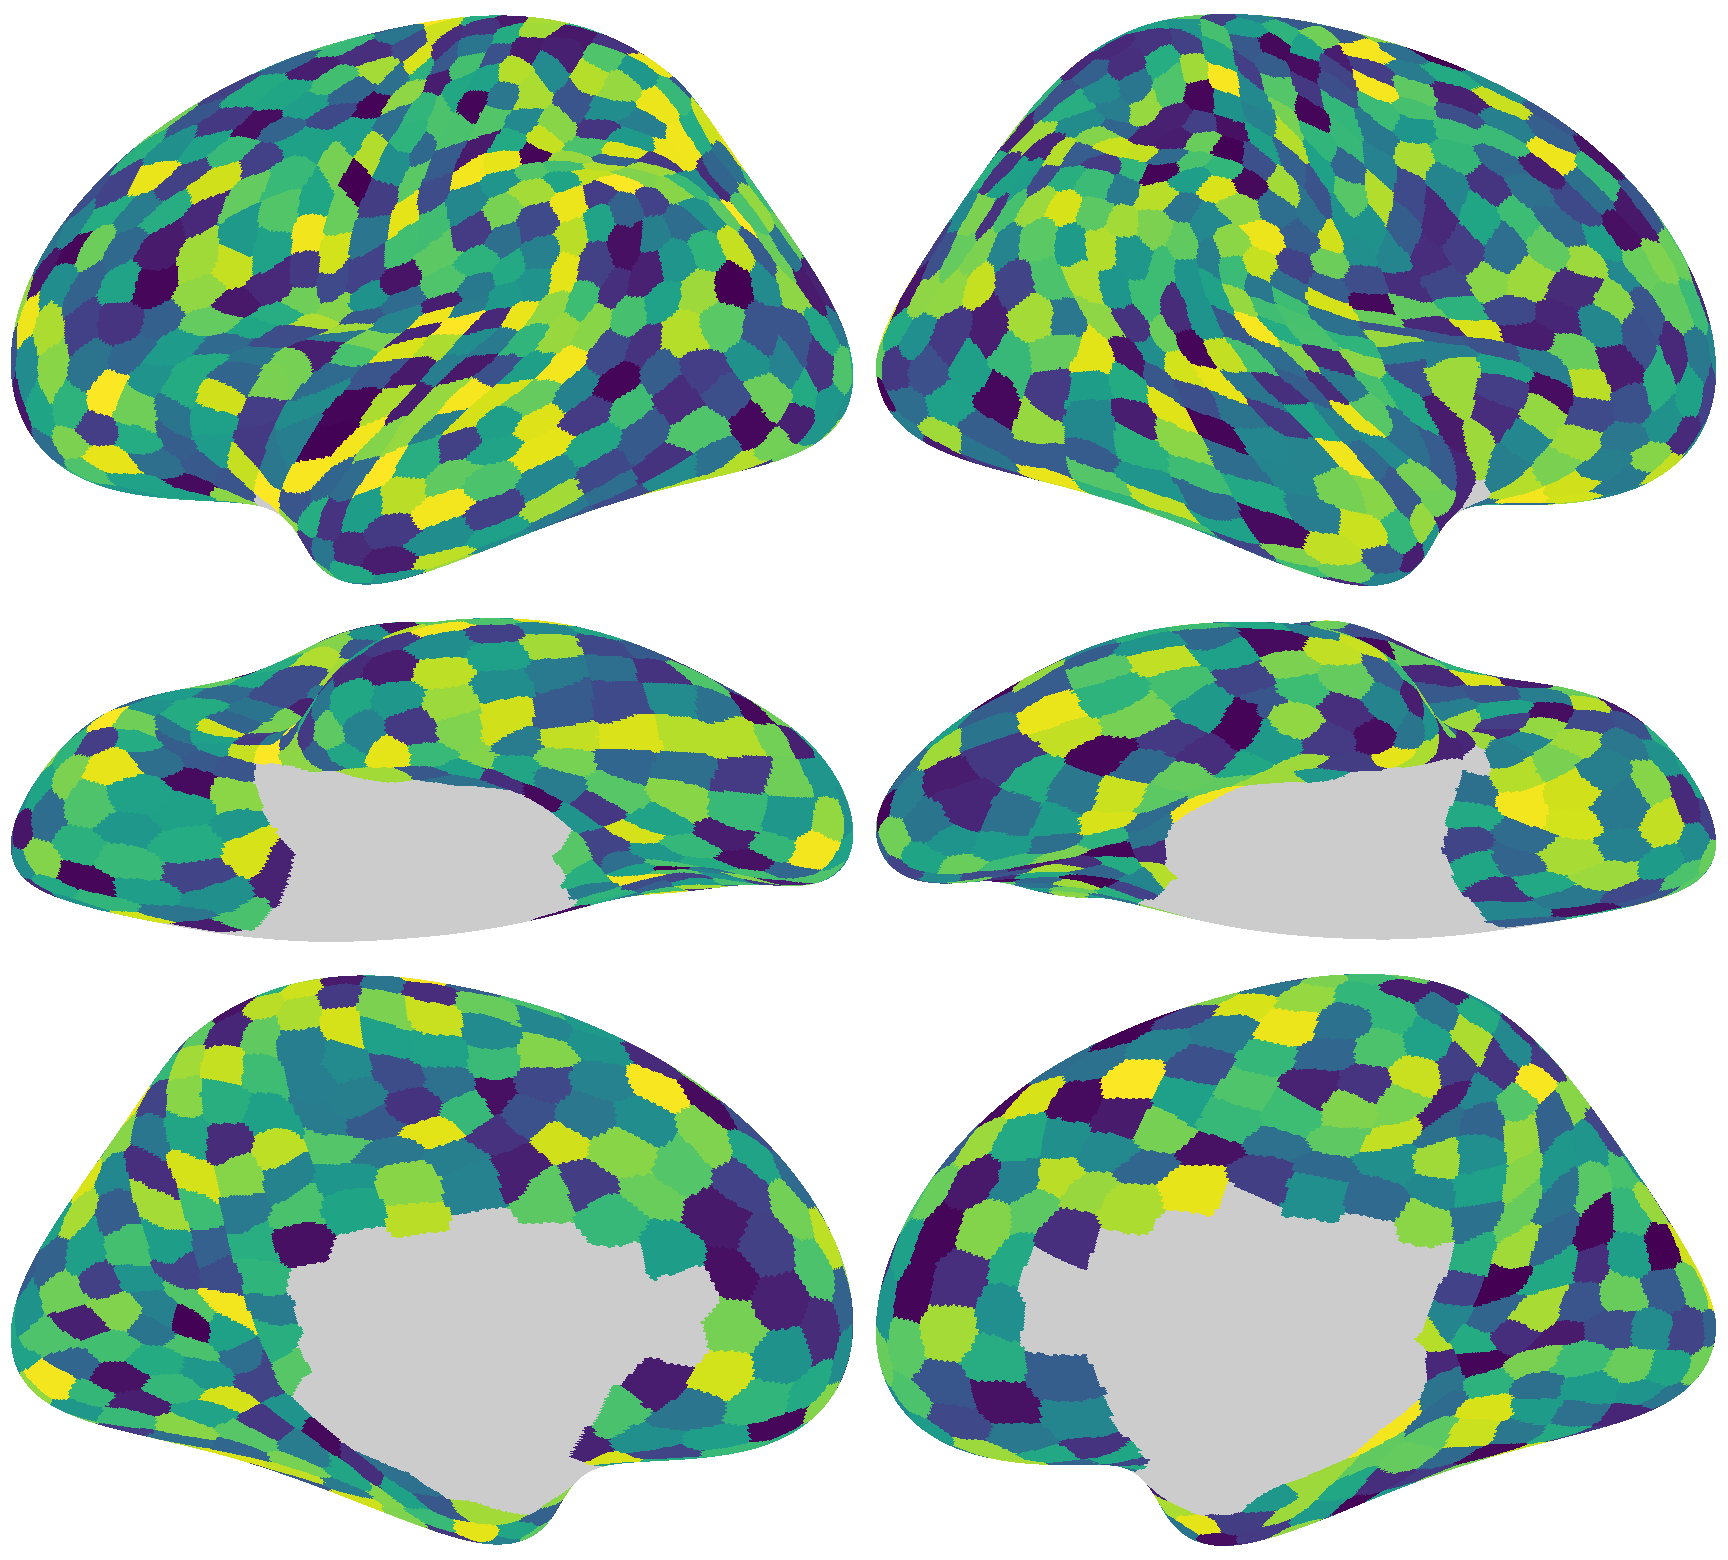

In [4]:
from myst_nb import glue
glue('save_image', im, display=False)

In [5]:
import cv2
## The default channel order of OpenCV is BGR rather than RGB.
reorder = {3: [2, 1, 0], 4: [2, 1, 0, 3]}[img.shape[2]]
cv2.imwrite(
    'save_image_opencv.png',
    np.round(img[:, :, reorder] * 255).astype(np.uint8))

True

`````{tab-set}
````{tab-item} Using matplotlib
```python
import matplotlib.pyplot as plt
fig = plt.figure(
    figsize=(img.shape[1] / 200, img.shape[0] / 200), dpi=200)
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img)
ax.axis('off')
plt.savefig('save_image_matplotlib.png')
plt.close()
```
````
````{tab-item} Using Pillow
```python
from PIL import Image
im = Image.fromarray(
    np.round(img * 255).astype(np.uint8))
im.save('save_image_pillow.png')
```
```{note}
The code block above requires that the [Pillow package](https://pillow.readthedocs.io/en/stable/index.html) has been installed.
```
````
````{tab-item} Using OpenCV
```python
import cv2
## The default channel order of OpenCV is BGR rather than RGB.
reorder = {3: [2, 1, 0], 4: [2, 1, 0, 3]}[img.shape[2]]
cv2.imwrite(
    'save_image_opencv.png',
    np.round(img[:, :, reorder] * 255).astype(np.uint8))
```
```{note}
The code block above requires that [OpenCV](https://opencv.org/) and its Python bindings to be installed.
```
````
`````

## Comparison of saved images
````{grid}
```{grid-item-card}
:class-header: bg-light text-center
Using matplotlib
^^^
![](save_image_matplotlib.png)
```
```{grid-item-card}
:class-header: bg-light text-center
Using Pillow
^^^
![](save_image_pillow.png)
```
```{grid-item-card}
:class-header: bg-light text-center
Using OpenCV
^^^
![](save_image_opencv.png)
```
````

{{ gallery_link }}